## Machine Learning & Data Science - Airline Passenger Satisfaction

This Data Analysis is going to implement the **QDAVI** approach lifecycle, then a **Machine Learning Model** will be built to predict satisfaction:

**Question**
* The purpose of this analysis, what significant problem/question to be solved.

**Data** 
* The data source used in this analysis came from **Kaggle**: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
* The data used in this analysis (**satisfaction.csv**) is the **train.csv** dataset on **Kaggle**.
* Preprocessing.

**Analysis**
* Analyse the data in order to solve the question. You may need to undertake more than one analysis to answer the question.

**Visualisation** 
* Express the analysis using visualisation in order to understand and extract insights from it.

**Insights**
* Find the insights and solutions that answer the question of concern.

**Machine Learning**
* Building a machine learning algorithm out of different potential algorithm, thus, fine tuning the best algorithm to obtain a final model to predict satisfaction.

<hr />

## Question

<hr />

**Scenario**

Acting as a person working at an airline company, and the company is trying to increase the airline passenger satisfaction in order to boost the market share and be more competitive among other companies. 

The company believes that customer service is always one of the top key that determines if the passengers are satisfied with our service provided. 

Given a task to analyse the service provided by the company, which requires to extract the facts and information that impacts the satisfaction of the passengers. Upon doing so, provide a plausible recommendation(s) to help the company to improve the passenger satifactions.

Ultimately, it is required to build a Machine Learning model to help predict the passenger satisfaction with the services that the passengers received.

<hr />

**Question (Problem Definition)**

* Stakeholder/ Target Audience: Airline company
* Main Purpose: Increase passenger satisfactions

> **Questions**: 

> **1. What are the key factors that significantly impact passenger satisfactions with the services provided by the airline company?**

> **2. Aside of Services provided by the company, identify the main areas that contribute most to the passenger satisfactions**
>    * Membership/Customer Type
>        * **Columns:** Customer Type, Gender       
>    * Demographics
>        * **Columns:** Age    
>    * Travel Details
>        * **Columns:** Class, Flight distance
>            * As *Departure Delay* and *Arrival Delay* are unpredictable, therefore, it will not be considered.
>            * For *Type of Travel* in terms of either Personal or Business, it will be excluded as services provided by the company are the same regardless.
    
**Why the questions are significant?**
* They are significant as by analyzing the key factors that impact passenger satisfaction, it allows me to identify on the specific areas where improvements can be done. By pinpointing these factors, the company can allocate resources and prioritize efforts to enhance the overall passenger experience.

<hr />

## Data

<hr />

**Airline Passenger Satisfaction Data**
* The data source used in this analysis came from **Kaggle**: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
* The data used in this analysis (**satisfaction.csv**) is the **train.csv** dataset on **Kaggle**.

<hr />

### Data Description

**Gender:** Gender of the passengers (Female, Male)

**Customer Type:** The customer type (Loyal customer, disloyal customer)

**Age:** The actual age of the passengers

**Type of Travel:** Purpose of the flight of the passengers (Personal Travel, Business Travel)

**Class:** Travel class in the plane of the passengers (Business, Eco, Eco Plus)

**Flight distance:** The flight distance of this journey

**Inflight wifi service:** Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

**Departure/Arrival time convenient:** Satisfaction level of Departure/Arrival time convenient

**Ease of Online booking:** Satisfaction level of online booking

**Gate location:** Satisfaction level of Gate location

**Food and drink:** Satisfaction level of Food and drink

**Online boarding:** Satisfaction level of online boarding

**Seat comfort:** Satisfaction level of Seat comfort

**Inflight entertainment:** Satisfaction level of inflight entertainment

**On-board service:** Satisfaction level of On-board service

**Leg room service:** Satisfaction level of Leg room service

**Baggage handling:** Satisfaction level of baggage handling

**Check-in service:** Satisfaction level of Check-in service

**Inflight service:** Satisfaction level of inflight service

**Cleanliness:** Satisfaction level of Cleanliness

**Departure Delay in Minutes:** Minutes delayed when departure

**Arrival Delay in Minutes:** Minutes delayed when Arrival

**Satisfaction:** Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

<hr />

### Data Imports

In [53]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, RocCurveDisplay

import xgboost as xgb

In [54]:
df = pd.read_csv('data/satisfaction.csv', index_col=[0])
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4.0,4.0,5.0,0.0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3.0,3.0,3.0,0.0,0.0,satisfied


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71549 entries, 0 to 71548
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 71549 non-null  int64  
 1   Gender                             71549 non-null  object 
 2   Customer Type                      71549 non-null  object 
 3   Age                                71549 non-null  int64  
 4   Type of Travel                     71549 non-null  object 
 5   Class                              71549 non-null  object 
 6   Flight Distance                    71549 non-null  int64  
 7   Inflight wifi service              71549 non-null  int64  
 8   Departure/Arrival time convenient  71549 non-null  int64  
 9   Ease of Online booking             71549 non-null  int64  
 10  Gate location                      71549 non-null  int64  
 11  Food and drink                     71549 non-null  int

### Data Preprocessing

**Missing values**

In [56]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        1
Inflight service                       1
Cleanliness                            1
Departure Delay in Minutes             1
Arrival Delay in Minutes             220
satisfaction                           1
dtype: int64

In [57]:
df.shape

(71549, 24)

There are missing values in `Checkin service`, `Inflight service`, `Cleanliness`, `Departure Delay in Minutes`, `satisfaction`

In [58]:
df[df.iloc[:, 18:24].isnull().all(axis=1)]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
71548,63781,Female,Loyal Customer,44,Business travel,Eco,1721,3,2,5,...,4,4,3,4,NaN,NaN,NaN,NaN,NaN,NaN


After investigation, the 1 missing values in `Checkin service`, `Inflight service`, `Cleanliness`, `Departure Delay in Minutes`, `satisfaction` are located at the same row.
* As **1 out of 71549** is only 0.0014% of the entire dataset, the best way is to drop the entire row.

In [59]:
df.dropna(subset=['satisfaction'], inplace=True)

Check for missing values of the same row have been addressed

In [60]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             219
satisfaction                           0
dtype: int64

The column with empty values are `Arrival Delay in Minutes`, a total of 219 missing values.
* As this column is a numerical column, first investigate the **distribution and skewness** before deciding to fill the values with **mean or median**.

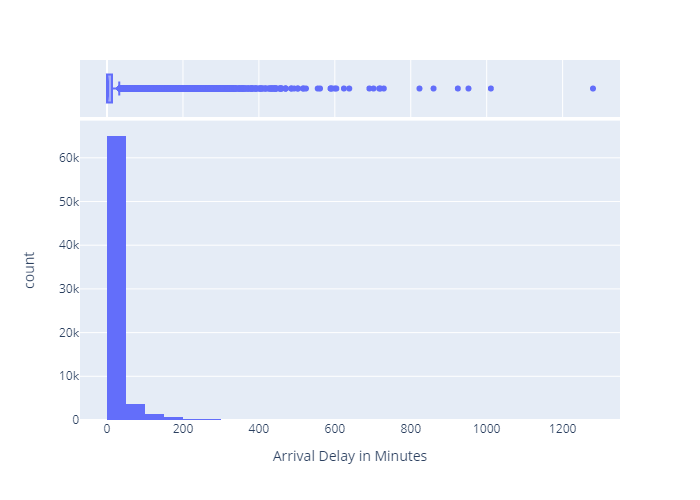

In [61]:
fig = px.histogram(df, x='Arrival Delay in Minutes', nbins=30, marginal='box')
fig.show('png')

As **mean** is greatly affected by outliers, **median** will instead be used to replace the missing values for this column.

In [62]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)

Missing values have all be filled

In [63]:
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

**Correcting Datatypes**

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71548 entries, 0 to 71547
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 71548 non-null  int64  
 1   Gender                             71548 non-null  object 
 2   Customer Type                      71548 non-null  object 
 3   Age                                71548 non-null  int64  
 4   Type of Travel                     71548 non-null  object 
 5   Class                              71548 non-null  object 
 6   Flight Distance                    71548 non-null  int64  
 7   Inflight wifi service              71548 non-null  int64  
 8   Departure/Arrival time convenient  71548 non-null  int64  
 9   Ease of Online booking             71548 non-null  int64  
 10  Gate location                      71548 non-null  int64  
 11  Food and drink                     71548 non-null  int

By looking into the data and comparing to data description, the following columns required change in datatype:

* **object** to **category**: `Gender`, `Customer Type`, `Type of Travel`, `Class`.

* **float64** to **int64**: `Checkin Service`, `Inflight Service`, `Cleanliness Service`, `Departure Delay in Minutes`, `Arrival Delay in Minutes`

* **object** to **int64**: `satisfaction`


**Note**
* For columns: `Inflight wifi service`, `Departure/Arrival time convenient`, `Ease of Online booking`, `Gate location`, `Food and drink`, `Online boarding`, `Seat comfort`, `Inflight entertainment`, `On-board service`, `Leg room service`, `Baggage handling`, `Checkin service`, `Inflight service`, `Cleanliness`
    * They are **satisfaction level** on a scale of 1 - 5, meaning that they are **not continuous number**. However, they will stay in **int64** datatype for the ease of this analysis.
    
* For column `satisfaction`, it will serve as **target** column at the later part, this column will be transformed into **binary values** in **int64**, with **1 representing satisfied** and **0 representing neutral or dissatisfied**.

In [65]:
df.iloc[:, 1:3] = df.iloc[:, 1:3].astype('category')
df.iloc[:, 4:6] = df.iloc[:, 4:6].astype('category')
df.iloc[:, 18:23] = df.iloc[:, 18:23].astype('int64')

# For target column, satisfaction
satisfaction_map = {'satisfied': 1, 'neutral or dissatisfied': 0}
df['satisfaction'] = df['satisfaction'].map(satisfaction_map)

C:\Users\linta\AppData\Local\Temp\ipykernel_48788\3408288537.py:1: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\linta\AppData\Local\Temp\ipykernel_48788\3408288537.py:2: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\linta\AppData\Local\Temp\ipykernel_48788\3408288537.py:3: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newval

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71548 entries, 0 to 71547
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   id                                 71548 non-null  int64   
 1   Gender                             71548 non-null  category
 2   Customer Type                      71548 non-null  category
 3   Age                                71548 non-null  int64   
 4   Type of Travel                     71548 non-null  category
 5   Class                              71548 non-null  category
 6   Flight Distance                    71548 non-null  int64   
 7   Inflight wifi service              71548 non-null  int64   
 8   Departure/Arrival time convenient  71548 non-null  int64   
 9   Ease of Online booking             71548 non-null  int64   
 10  Gate location                      71548 non-null  int64   
 11  Food and drink                     71548 

<hr />

## Analysis

<hr />

### Distribution

Before performing a meaningful analysis, it is important to investigate if the columns that contribute to the passengers' experience have unequal weightage.
* For example, there are significant more male than female, or vice versa, present in the dataset, which might affect the outcome.
* The columns to investigate: `Gender`, `Customer Type`, `Age`, `Class`, `Flight Distance`.
    * These columns are **assumed** to be the main contributors to other flight-experiences, and ultimately affect the overall satisfaction.

To address this issue, it is **assumed** that all responses are filled in correctly without errors.
* For example, a passenger did not accidentally fill the **Age** column wrongly to another value.

Then, distribution analysis of the stated column will be done to investigate the skewness to understand **if responses are fair**.

In [67]:
# Function to display distributions for multiple columns
def distribution_analysis(cols: list) -> None:
    for col in cols:
        fig = px.histogram(df, x=col, marginal='box')
        fig.show('png');

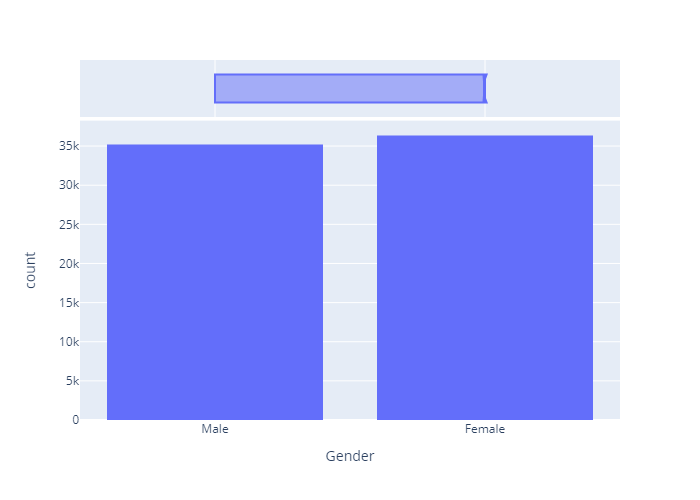

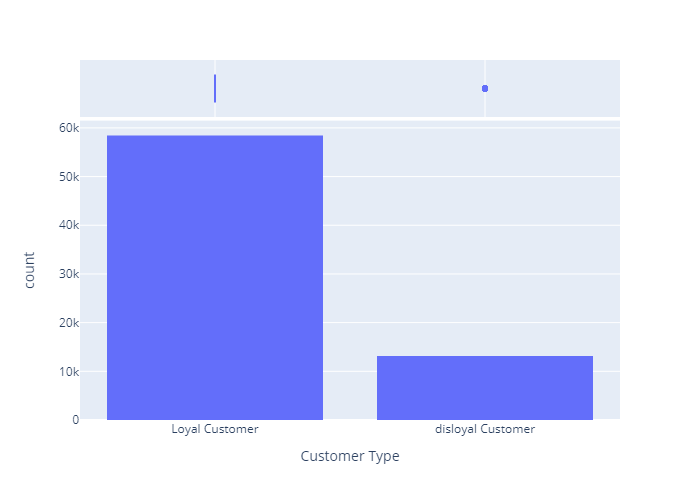

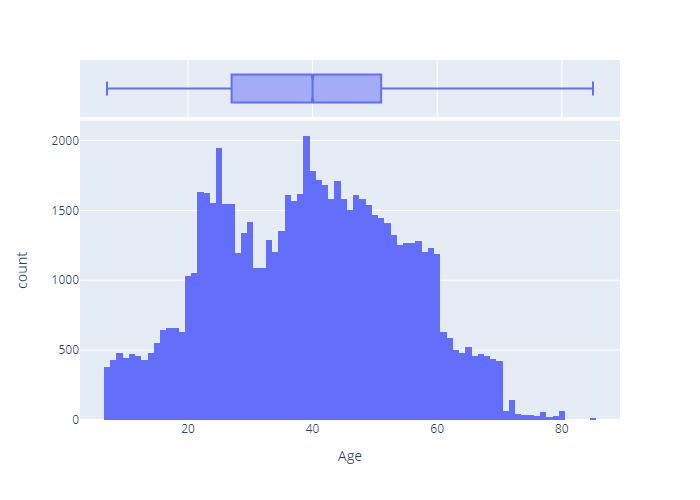

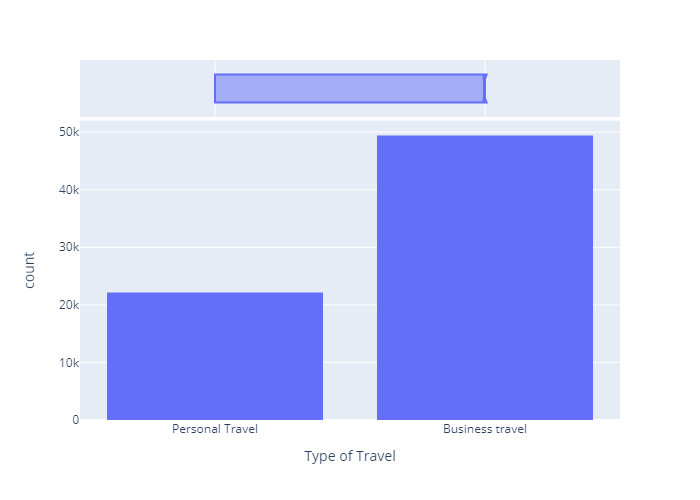

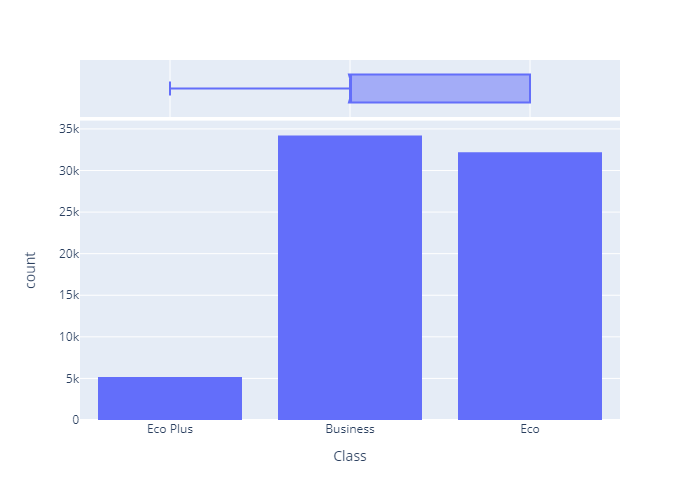

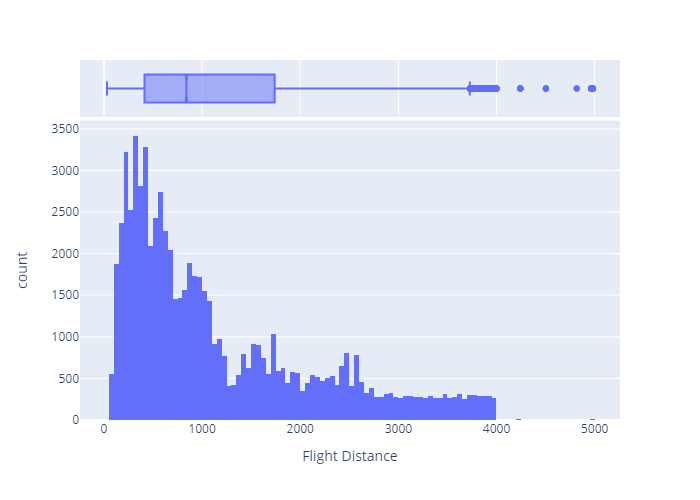

In [68]:
# Get columns from 1 to 6
distribution_analysis(df.iloc[:, 1:7].columns)

From the above distribution:
* There is equal distribution for `Gender`, that is, the number of **male** and **felmale** are approximately equal in this responses.
    * No `Gender` biases
    
    
* For `Customer Type`, there are significantly **more loyal customers** than disloyal customers.
    * This might cause the dataset to be **biased**, thus, contributing to the overall satisfaction rate.
    * Loyal customers are the customers who frequently fly with our flight company, meaning that they are **potentially more satisfied** overall.
        * This will be further investigated when comparing to `satisfaction` column.
        
* For `Age`, the majority of the responses are gathered from between the age of 20 - 60.
    * It will require investigation to see **if age range affects satisfaction** to avoid biases.
    
* For `Type of Travel`, majority of the responses are under **business travel**
    * Generally, business travel does not require each response to pay for their own flight.
    * It will be interesting to see if **business travel** has more satisfaction, and the **class** that they are flying.
    
* For `Flight Distance`, majority of the responses fly a rather shorter distance (less than 1000 kms).
    * As the longer that a person sits on the plane, the more uncomfortable that they will become.
    * However, this might not be the same for the class that each passenger is travelled with.
    * Thus, it will require to investigate the **satisfaction with flight distance** and **the relationship between flight distance, class, satisfaction**.
    

> The main reasons to perform the analysis shown above is to be **as neutral as possible**, that is, **to avoid potential biases**.
> * For example, the majority of the people are loyal customers, they might have a higher likelihood to have **satisfied** as their answers on the survey. This contributes to the **overall satisfaction rate** of the survey.
>    * Without performing these analysis, we might **overestimate** the number of people who are satisfied, as the majority of the people who are satisfied might be from the answers of **loyal customers**.

<hr />

## Visualizations

<hr />

### Overall Satisfaction Rate

In [69]:
# Making a count dataframe for 'satisfaction'
satisfaction_df = df['satisfaction'].replace({0: 'neutral & disatisfied', 1: 'satisfied'}).value_counts().reset_index()
satisfaction_df

,index,satisfaction
0,neutral & disatisfied,40430
1,satisfied,31118


In [70]:
satisfaction_df.columns = ['satisfaction', 'count']
satisfaction_df

,satisfaction,count
0,neutral & disatisfied,40430
1,satisfied,31118


Adding a `percentage` column to make it easier to compare

In [71]:
satisfaction_df['percentage'] = round(satisfaction_df['count'] / satisfaction_df['count'].sum() * 100, 2)
satisfaction_df

,satisfaction,count,percentage
0,neutral & disatisfied,40430,56.51
1,satisfied,31118,43.49


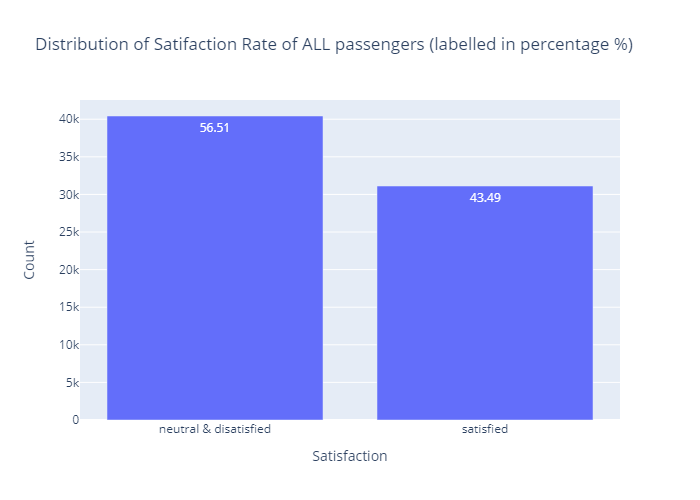

In [72]:
fig = px.bar(satisfaction_df,
             x='satisfaction',
             y='count',
             text='percentage',
             labels={'count': 'Count', 'satisfaction': 'Satisfaction'},
             title='Distribution of Satifaction Rate of ALL passengers (labelled in percentage %)')

fig.show('png')

From the first glance of the distribution above, it will easily be assumed that **more than half (56.51%)** of the passengers are **disatisfieid**.

However, is it really a **fair comparison?**
* The disatisfaction rate **might be even higher** or **lower**, depending on the **factors mentioned previously**.

To avoid **potential biases**, we need to perform further investigation.

<hr />

### Gender and Satisfaction Rate

As both genders (male and female) are almost equal in quantity, it will be interesting to see if different gender has a different opinion on the services provided.

To plot a **heatmap** showing the comparison, a **confusion matrix** has first to be made
* The portions are converted into **percentages**

In [73]:
gender_cm = round(pd.crosstab(df['Gender'], df['satisfaction'], normalize='index') * 100, 2)
gender_cm

satisfaction,0,1
Gender,,
Female,57.33,42.67
Male,55.66,44.34


Visualizing the effect of **Gender** on **Satisfaction Rate**

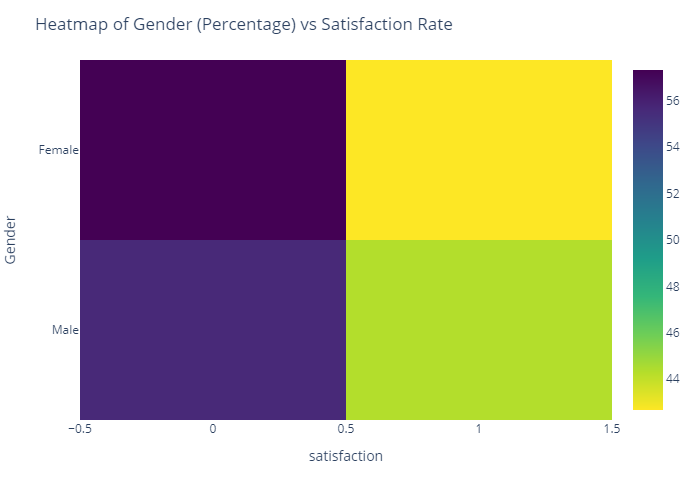

In [74]:
gender_heatmap = px.imshow(gender_cm, color_continuous_scale="Viridis_r")
gender_heatmap.update_layout(title="Heatmap of Gender (Percentage) vs Satisfaction Rate")
gender_heatmap.show('png')

The above heatmap implies that **Gender** has no huge impact on the satisfaction rate as both genders have similar satisfaction rate.
* In terms of the the difference in percentage between people who are **satisfied** and **neutral/disatisfied** of each gender, there is no significant difference.
* This may serve as a hint that the services provide by the flight company has not made people of different gender feel differently.
* Thus, **Gender** will not be a factor to be considered when trying to improve the servies to improve the satisfaction rate.

<hr />

### Customer Type and Satisfaction Rate


* Does **Loyal Cusomter** and **Disloyal Customer** has an effect on **satisfaction rate**?

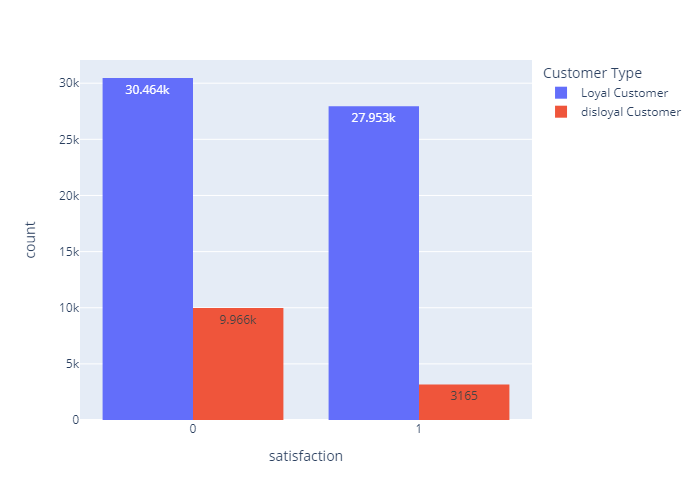

In [75]:
fig = px.histogram(df[['satisfaction', 'Customer Type']], 
                   x='satisfaction', 
                   barmode='group',
                   text_auto=True,
                   color='Customer Type')
fig.show('png')

From the plot above, with **0** denoting **neutral/disatisfied** and **1** denoting **satisfied**: 
* It can be seen that comparing to **disloyal customers**, **loyal customers** have a higher tendency to be satisfied with the service.

**However**, the graph above alone is not enough to fulfill the justification, as the majority of the responses are from **loyal customers**.
* The number of **loyal customers** who participated in answering the survey is **significantly larger**.
> To make the comparison **more fair**, it will require to further compare the **percentage** of satisfaction and neutral/disatisfied for **each customer type**.

**Loyal Customers / Disloyal Customers in Percentage and Satisfaction Rate**

Make a dataframe to identify the satisfaction of **loyal customers**

In [76]:
loyal_df = df[df['Customer Type'] == 'Loyal Customer']['satisfaction'].replace({0: 'neutral & disatisfied', 1: 'satisfied'}).value_counts().reset_index()
loyal_df.columns = ['satisfaction', 'count']
loyal_df['percentage'] = round(loyal_df['count'] / loyal_df['count'].sum() * 100, 2)
loyal_df.head()

,satisfaction,count,percentage
0,neutral & disatisfied,30464,52.15
1,satisfied,27953,47.85


Make a dataframe to identify the satisfaction of **disloyal customers**

In [77]:
disloyal_df = df[df['Customer Type'] == 'disloyal Customer']['satisfaction'].replace({0: 'neutral & disatisfied', 1: 'satisfied'}).value_counts().reset_index()
disloyal_df.columns = ['satisfaction', 'count']
disloyal_df['percentage'] = round(disloyal_df['count'] / disloyal_df['count'].sum() * 100, 2)
disloyal_df.head()

,satisfaction,count,percentage
0,neutral & disatisfied,9966,75.9
1,satisfied,3165,24.1


Visualization of **Loyal Customers / Disloyal Customers and Satisfaction Rate**

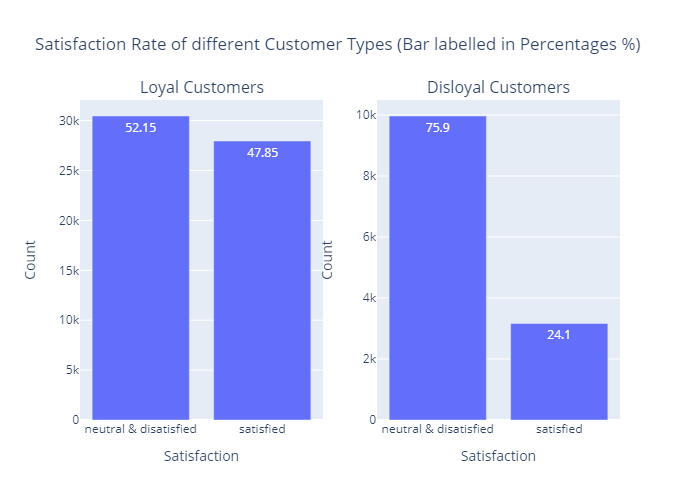

In [78]:
def make_loyal_bar(df:pd.DataFrame, is_loyal) -> px.bar:
    return px.bar(df,
                  x='satisfaction',
                  y='count',
                  text='percentage',
                  labels={'count': 'Count', 'satisfaction': 'Satisfaction'},
                  title=f'Distribution of Satifaction Rate of {"Loyal" if is_loyal else "Disloyal"} Customers (labelled in percentage %)')
    
fig = make_subplots(rows=1, cols=2, subplot_titles=("Loyal Customers", "Disloyal Customers"))

loyal_bar = make_loyal_bar(loyal_df, True)
disloyal_bar = make_loyal_bar(disloyal_df, False)

fig.add_trace(loyal_bar.data[0], row=1, col=1)
fig.add_trace(disloyal_bar.data[0], row=1, col=2)

fig.update_xaxes(title_text='Satisfaction', row=1, col=1)
fig.update_xaxes(title_text='Satisfaction', row=1, col=2)
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=2)

fig.update_layout(title_text="Satisfaction Rate of different Customer Types (Bar labelled in Percentages %)")
fig.show('png')

From the plots above, it can clearly be seen that for **customers** who are **loyal**, they will have a **higher likelihood of being satisfied**, whereas for **customers** who are **disloyal**, the majority of them are **disatified (75.9%)**.
* This implies that **Customer Type** has an impact on **whether if they are satisfied with the service**, and the company can work on **having more customers entering the loyalty program**.

<hr />

### Age and Satisfaction Rate

* Class of flight that the passengers took is analyzed in this section.

It will be important to find out if people who different age feel differently in terms of satisfaction.

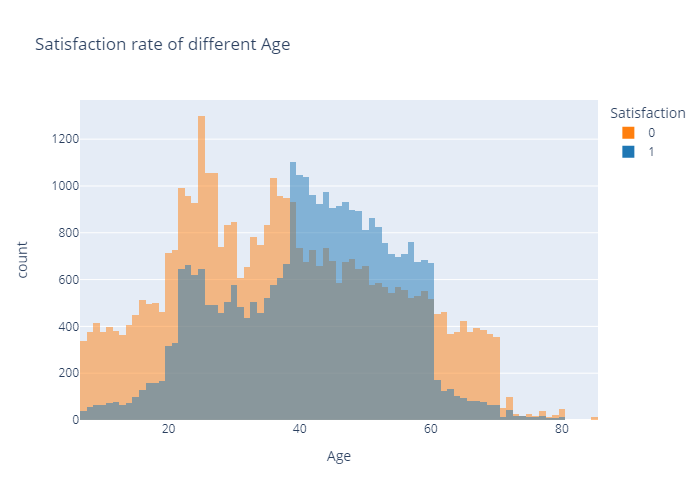

In [79]:
hist_age_satisfaction = px.histogram(df, 
                                     x='Age', 
                                     barmode='overlay', 
                                     color='satisfaction',
                                     labels={'satisfaction': 'Satisfaction'},
                                     title='Satisfaction rate of different Age',
                                     color_discrete_sequence=['#FF7F0E', '#1F77B4'])
hist_age_satisfaction.show('png')

> In the graph above, satisfaction is represented as follows:
> * **0 = neutral/disatisfied (orange)**
> * **1 = satisfied (blue)**

From the age distribution in terms of satisfaction rate, it is interesting to note that from the age of **39 - 60**, there are more people who are **satisfied**, while for all other age groups, the majority of the people are **unsatisfied**.

**However**, to **make a fair judgement**, before making a justification, it will be interesting to investigate if these people in the age of **39 - 60** are the majority who made up of the **loyal customers**, as from the previous analysis, loyal customers tend to express a higher possibility of being satisfied.

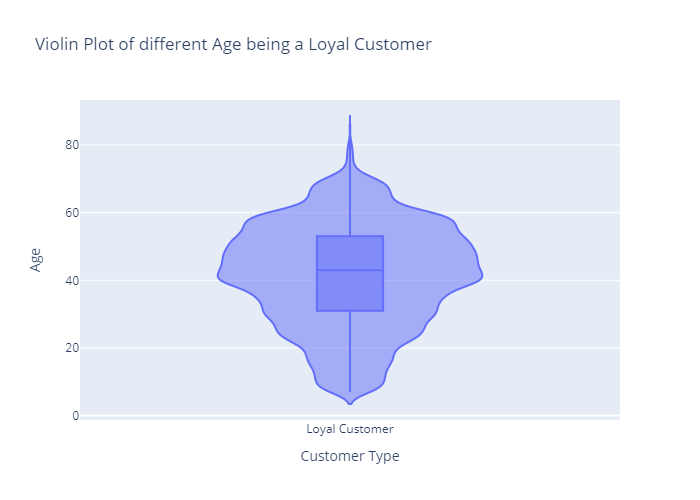

In [80]:
fig = px.violin(df[df['Customer Type'] == 'Loyal Customer'], 
                x='Customer Type', 
                y='Age',
                title='Violin Plot of different Age being a Loyal Customer',
                box=True)
fig.show('png')

From the plot above, it can be seen that there are **more loyal customers** between the age group of **39 - 60**.

**However**, does it really is the **main reason** of people between the age of **39 - 60** being more satisfied, or is it just one of the reason?
* To further make a fair judgement, it will be interesting to see if these people are travelling under **different airline classes**.

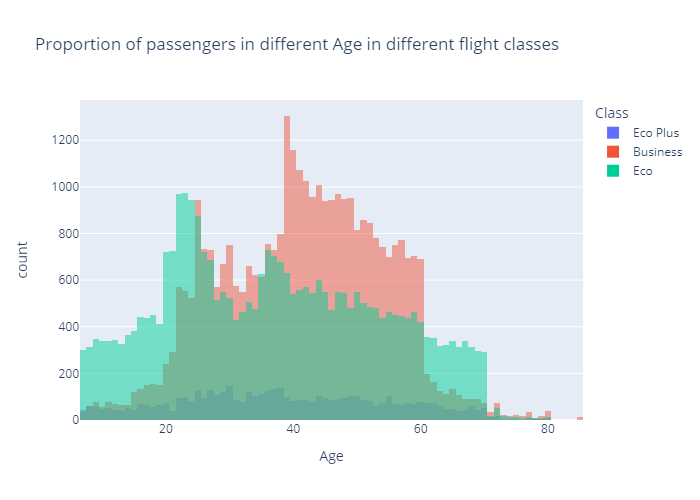

In [81]:
hist_age_class = px.histogram(df, 
                              x='Age', 
                              color='Class', 
                              barmode='overlay',
                              title='Proportion of passengers in different Age in different flight classes')
hist_age_class.show('png')

**For better visualization, let's put graphs side by side.**

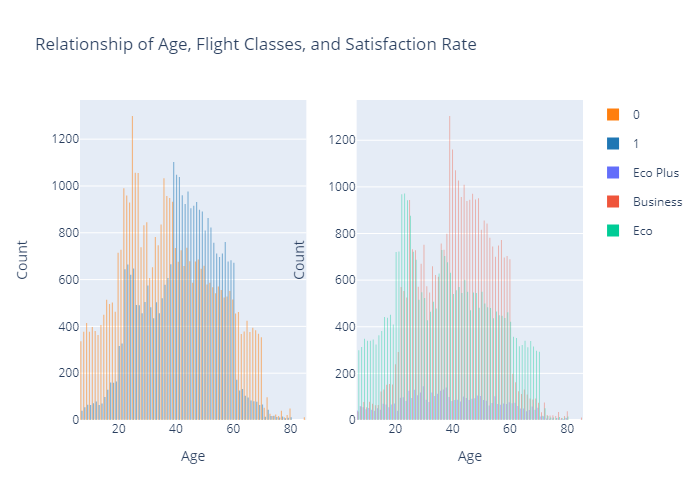

In [82]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(hist_age_satisfaction.data[0], row=1, col=1)
fig.add_trace(hist_age_satisfaction.data[1], row=1, col=1)
fig.add_trace(hist_age_class.data[0], row=1, col=2)
fig.add_trace(hist_age_class.data[1], row=1, col=2)
fig.add_trace(hist_age_class.data[2], row=1, col=2)

fig.update_xaxes(title_text='Age', row=1, col=1)
fig.update_xaxes(title_text='Age', row=1, col=2)
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=2)

fig.update_layout(title_text="Relationship of Age, Flight Classes, and Satisfaction Rate")
fig.show('png')

From the above plot, aside of more customers between the age of **39 - 60** are loyal customers, but more importantly, the majority of the passengers between this age group fly with **business class**.
* This will explain the dramatic difference of people in this age group being more satisfied.

To **further justify** the reasoning, it will also be important to take a look at how flying with **different classes** affect **satisfaction**.

In [83]:
# Make Confusion Matrix of Class and Satisfaction
class_cm = round(pd.crosstab(df['Class'], df['satisfaction'], normalize='index') * 100, 2)
class_cm

satisfaction,0,1
Class,,
Business,30.64,69.36
Eco,81.06,18.94
Eco Plus,74.78,25.22


**Class vs Satisfaction Visualization**

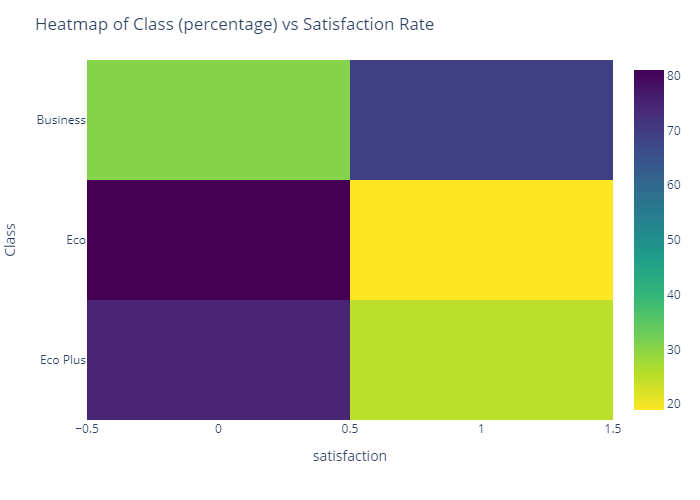

In [84]:
class_heatmap = px.imshow(class_cm, color_continuous_scale="Viridis_r")
class_heatmap.update_layout(title="Heatmap of Class (percentage) vs Satisfaction Rate")
class_heatmap.show('png')

From the heatmap, it is obvious that whether or not a person is flying with **business class** has a **huge impact** on whether the person is satisfied with the services provided.
* Thus, provides insights of people between the age group of **39 - 60** being drastically more satisfied.

> Combining with the previous analysis, aside of focusing on getting people to join the loyalty program, the company should also include deals that are related with the **flight class** such as having promotions of business class for frequent flyers, or at a discounted price from time to time.

<hr />

### Flight Distance and Satisfaction

A lot of times, the flight distance contributes to the comfort that the flight passengers will feel. Thus, it will also be another factor to be considered when analyzing the satisfaction rate.

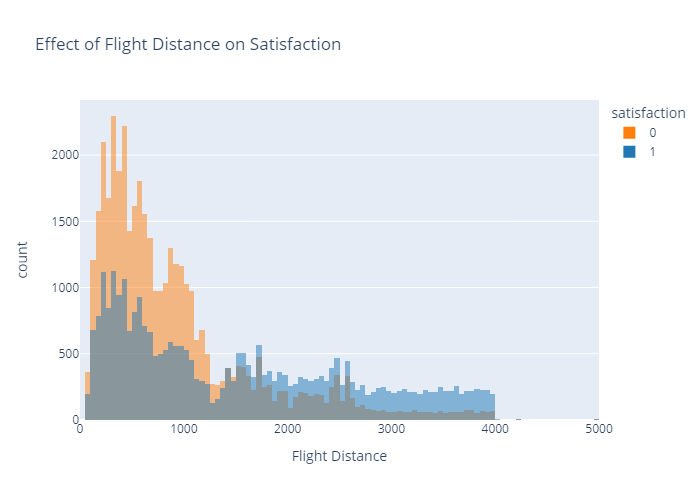

In [85]:
fig = px.histogram(df, 
                   x='Flight Distance',
                   barmode='overlay',
                   color='satisfaction',
                   title='Effect of Flight Distance on Satisfaction',
                   color_discrete_sequence=['#FF7F0E', '#1F77B4'])

fig.show('png')

By looking at the plot above, it can easily be seen that more people are experiencing neutral or disatisfaction for **flight with shorter distances (< 1250)**.
* This might be due to the passengers will experience more frequently in terms of the services provided by the flight company.
* As the flight distance increases, the satisfaction rate overtakes the disatisfaction rate.

**However**, it is again **too early to make a judgment** as before, which might lead to not having enough **ethical considerations / human factors**, and might cause **bias** in the data.

Therefore, other factors need to also be considered.

> As seen previously, **Class** has a **huge impact** in terms of satisfaction. It will be interesting to see if passengers from certain classes contribute mainly to the disatisfaction.

**Flight Class (Eco, Eco Plus, Business) and Flight Distance**

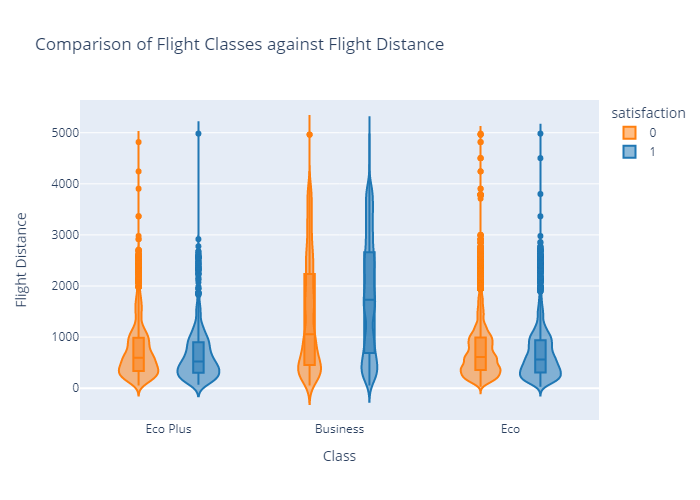

In [86]:
violin_class_dist = px.violin(df, 
                              y="Flight Distance", 
                              x="Class", 
                              color="satisfaction",
                              title='Comparison of Flight Classes against Flight Distance',
                              color_discrete_sequence=['#FF7F0E', '#1F77B4'],
                              box=True)
violin_class_dist.show('png')

By looking at the violin plot, people in **Eco** and **Eco Plus** made up the majority of the passengers for **flight distance < 2000**.

Also, as the flight distance increases, passengers in business class increase in terms of the passengers distribution.

To take a closer look at the class distribution and satisfaction, let's make a **detailed histogram**.

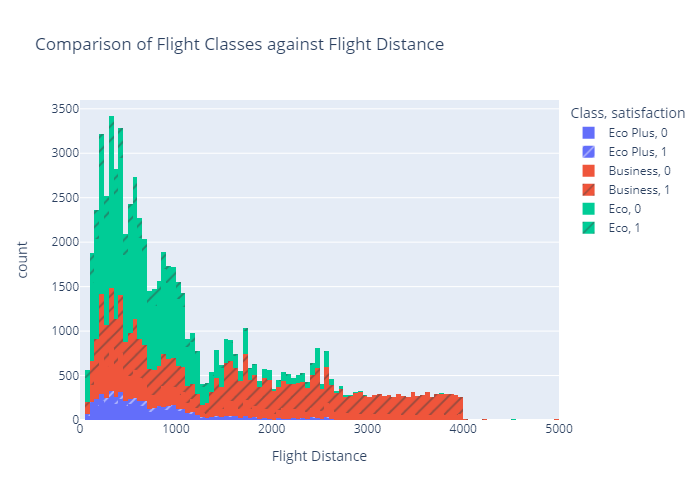

In [87]:
hist_class_dist = px.histogram(df, 
                               x='Flight Distance', 
                               color='Class', 
                               pattern_shape="satisfaction",
                               title='Comparison of Flight Classes against Flight Distance')
hist_class_dist.show('png')

With the detailed histogram, it can easily be determined that:
* The majority of the passengers are flying with **Eco**, and most people in the **Eco** class are neutral/unsatisfied.
* For people who are flying with **Business**, a much greater proportion of people are satisfied.

Without performing this further analysis, it can easily be assumed that shorter flight distance contributes to higher unsatisfaction with no logical reasoning, thus, making the analysis **more bias**.

By taking these factors into considerations, we can then see that for shorter flight distances, the **majority of the people are flying with Eco**, and they made up the majority of **unsatisfaction**.

<hr />

## Insights

<hr />

### Ethical Considerations in this Analysis

Before summarizing the insights obtained from the analysis, let's summarize the **Ethical Considerations** in this analysis.

In the analysis, before diving into any further analysis, the very first thing that comes into my mind was the weightage of the responses where relevant. 
* To illustrate more, take `Class` (Flight Class that the passengers take while travelling) as an example, as people flying with **business class** tend to have **much higher satisfaction** comparing to all other classes, then, we have to ask ourselves, is it a **unbias analysis** if we only look at **overall satisfaction**?

* What if **70% of the passengers fly with non-business class**? Does it perfectly reflect **people from all classes overall**?

Without putting these into considerations, the analysis can get very biased.

With these considerations and human factors in mind, this analysis is then performed, and the following parts are where the ethical considerations are considered:
1. First, the analysis looks at **overall satisfaction**, and it was found that the **unsatisfied/neutral** weightage is similar to **satiesfied** (56.51% and 43.49% respectively).
    * However, as what what mentioned earlier, I **doubted if this is a fair comparison**, and the satisfaction rate might be higher, or lower.
    
    
2. After further investigation, it was found that **Loyal Customers** tend to express a higher satisfaction rate comparing to **Disloyal Customers** (47.85% 24.1% respectively).
    * One thing to note is that it was found that there are way more **Loyal Customers** comparing to **Disloyal Customers**, and if this is not considered, the analysis is again biased.
    * Therefore, the satisfaction rate was taken as **percentage for each group**.
    
    
3. People between the `Age` of **39 - 60** reflected a **way higher satisfaction rate** than any other age groups.
    * However, we cannot easily assume for a random reason why people within these age are satisfied.
    * Thus, further investigation of `Age` group was performed.
    
    
4. As it was found earlier that **Loyal Customers** are generally more satisfied, I first went to investigate the relationship between **Loyal Customers** and `Age`.
    * It was found that more people between the `Age` of **39 - 60** are airline company's **Loyal Customers**.
    * **However**, I again asked myself, is this good enough and considered all human factors? In another words, is this investigation not bias? This is because there are still many other noticeable `Age` group who are **Loyal Customers**.
    * With this doubt in mind, I carry on the investigation of `Age` between **39 - 60** being more **satisfied**.
    
    
5. I then went into investigating the **relationship between flight `Class` and `Age`**.
    * This time, it was found that the **majority of the people between `Age` 39 - 60 flys under the `Class` business**.
    * This lights up the reason why people in this age group are more satisfied.
    * **However, again,** can I say this as an unbiased analysis?


6. I then went to investigate the **relationship between `Class` and `Satisfaction`**.
    * At this time, it was clearly found that people flying with **Business `Class`** takes up the **majority of the satisfaction**.
    * Therefore, this solves the doubt of the reason why people between the `Age` of **39 - 60** express **way more satisfaction** than any other age groups.
    

7. As I found out that there is a relationship between the `Class` and `Satisfaction` rate, I then wonder if there is a difference between the `Flight Distance` and the `Class`, to further make sure the analysis is unbias.
    * The analysis clearly showed that people flying with **economy `Class`** takes up the majority of the passengers percentage for the flight under **1000km**, while majority of these people are **unsatisfied**.
    * **However**, when we take a look at the **business `Class`**, at least 50% of the people are satisfied with most of the `Flight Distance`.
    * Therefore, it clearly indicates that flying with different `Class` will make a difference in terms of **satisfaction rate**.

<hr />

### Insights that provide answers to our area of concern

Originally, the questions to solve for the stakeholders were:
1. What are the key factors that significantly impact passenger satisfactions with the services provided by the airline company?

2. Aside of Services provided by the company, identify the main areas that contribute most to the passenger satisfactions.

* Stakeholder/ Target Audience: Airline company
* Main Purpose: Increase passenger satisfactions

To assist the company to improve passenger satisfactions, the key factors to consider are:
1. Promoting on the **Loyalty Program** to the passengers at it has a strong relationship with **satisfaction rate**.

2. On top of that, the company can put in a little more extra resources for people in other **flight classes** aside of business, as **economy and economy plus** are the main reason of **unsatisfaction**.

3. The company can put more effort and resources in **flights under 1000km** as the passengers tend to be more active, and are most likely to expose the most to the services provided by the company.

4. Reserve a **certain percentages of business class seats** for special promotions, exclusively to **Loyal Customers**, with this, not only more people will join the **loyalty program**, but they are also more likely to have a chance to fly with **business class**, thus, ultimately be more **satisfied** in both ways.


By summarizing the above points, the main areas that contribute to the passenger satisfactions are:
* Loyalty of the customers (Loyalty Program)
* Flight class that the passengers are flying
* Flight distance

> By putting in more resources to the above areas, it is believed that the **satisfaction rate** will improve significantly. Thus, ultimately solves the concern that the stakeholder (airline company) is facing.

<hr />

## Machine Learning

<hr />

To build a **Machine Learning** model for the airline company to predict the satisfaction rate, it will follow the steps below:
1. Feature Selection (To reduce dimension of the features, as the more dimensions of the input data, the poorer the performance)


2. Data Preprocessing (Mainly cleaned in the previous section, but relevant feature transformations to be performed for the purpose of ML)


3. Data Splitting (To separate training data and testing data for evaluation purposes)


4. Feature Scaling (To make all numerical variable into the same scale so that the model will treat them equally)
    * This is done **after** data splitting, to prevent **data leakage**, thus, preventing overtraining.
    
    
5. Training a ML model
    * Several relevant models will be trained and compared to provide a best algorithm.
    

6. Hyperparameter Tuning
    * Tuning the hyperparameter to see if the performance of the chosen model(s) can further be boosted.
    
    
7. Model Inference
    * To evaluate the performance of the model, thus, reporting how relevant the model can be used to predict the results.

<hr />

### 1. Feature Selection

Remove the features that are **irrelevant** to our **area of concern**.

In [88]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Aside of the features that were found to be less important in this analysis, are there any other features that can be dropped?
* Let's do a **correlation matrix** to identify the features that are highly correlated, and select **one** to **reduce dimensionality**.
* **Reducing dimensionality** improves performance, and also **prevent multicollinearity**.

C:\Users\linta\AppData\Local\Temp\ipykernel_48788\683160857.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



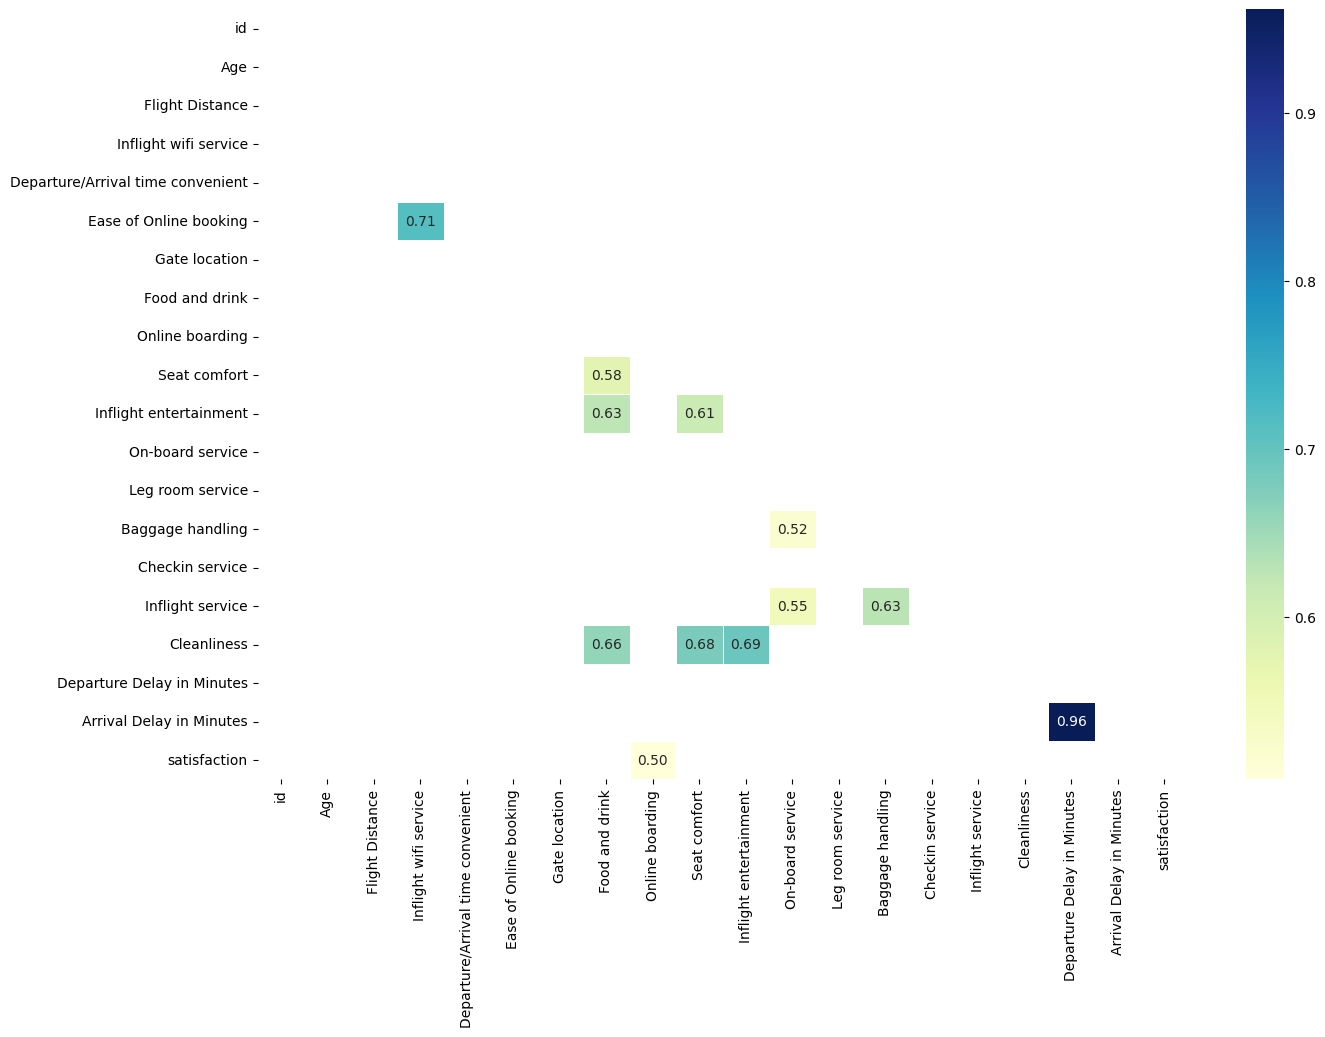

In [89]:
# Create correlation matrix
corr_matrix = df.corr()

# Mask to cover the upper half triangle for visualization purposes
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Select the features with threshold > 0.5, to easily visualize
corr_masked = corr_matrix.mask(abs(corr_matrix) < 0.5)

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_masked,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu',
                 mask=mask);

From the above correlation matrix, there are features that are **highly alike of each other**. Therefore, some of the features will be selected over the other to reduce dimensionality.
* Features to remove from the **matrix**: `Online boarding`, `Departure Delay in Minutes`, `Food and drink`, `Seat comfort`, `Inflight entertainment`, `On-board service`, `Baggage handling`, `Inflight wifi service`.

* Features to remove from the **analysis**: 
1. `Gender` as it shows no effect on the **satisfactio rate**.
2. `Type of Travel` is not something provided by the airline company.

* Features that is not related: `id`

In [90]:
# Define features to drop
features_to_drop = ['id', 
                    'Gender', 
                    'Type of Travel',
                    'Online boarding', 
                    'Departure Delay in Minutes', 
                    'Food and drink', 
                    'Seat comfort', 
                    'Inflight entertainment',
                    'On-board service',
                    'Baggage handling',
                    'Inflight wifi service']
df.drop(features_to_drop, axis=1, inplace=True)

In [91]:
df.head()

,Customer Type,Age,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Leg room service,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,13,Eco Plus,460,4,3,1,3,4,5,5,18,0
1,disloyal Customer,25,Business,235,2,3,3,5,1,4,1,6,0
2,Loyal Customer,26,Business,1142,2,2,2,3,4,4,5,0,1
3,Loyal Customer,25,Business,562,5,5,5,5,1,4,2,9,0
4,Loyal Customer,61,Business,214,3,3,3,4,3,3,3,0,1


<hr />

### 2. Data Preprocessing

Further feature transformations to be performed for the purpose of ML

**Data Transformation**
* As many of the features that are numeric are **categorical**, as they are rated between a discrete range (eg. scale of 1 - 5), so they need to be transformed into categorical.

In [92]:
df.iloc[:, 4:11] = df.iloc[:, 4:11].astype('category')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71548 entries, 0 to 71547
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Customer Type                      71548 non-null  category
 1   Age                                71548 non-null  int64   
 2   Class                              71548 non-null  category
 3   Flight Distance                    71548 non-null  int64   
 4   Departure/Arrival time convenient  71548 non-null  category
 5   Ease of Online booking             71548 non-null  category
 6   Gate location                      71548 non-null  category
 7   Leg room service                   71548 non-null  category
 8   Checkin service                    71548 non-null  category
 9   Inflight service                   71548 non-null  category
 10  Cleanliness                        71548 non-null  category
 11  Arrival Delay in Minutes           71548 

**Encoding of categorical features**
* This improves efficiency and performance, and also, most of the algorithm works with numbers.

In [94]:
# Turning categorical values that are not in numbers into numbers
cat_features = ['Customer Type', 'Class']

for key, value in df[cat_features].items():
    df[key] = pd.Categorical(value).codes

<hr />

### 3. Data Splitting 

To separate training data and testing data for evaluation purposes

In [95]:
# Splitting dataset into features and target variables
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Data splitting
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<hr />

### 4. Feature Scaling 

To make all numerical variable into the same scale so that the model will treat them equally.

If **feature scaling** is done before **data splitting**, it will result in **data leakage**, thus, making the model to be more prone to **overfitting**.

**Standardization** is applied
* Between normalization and standardization, normalization works best when the data is normally distributed.
* For standardization, it works well the most of the time.

In [96]:
sc = StandardScaler()

# Standardize training data
X_train = sc.fit_transform(X_train)

# Standardize test data USING training data's scaler (prevent data leakage, and make them into same scale)
X_test = sc.transform(X_test)

<hr />

### 5. Training a ML model

Several relevant models will be trained and compared to provide a best algorithm.

When performing Machine Learning, despite of our understanding our dataset, and having in mind which algorithm **might** work well.
* **However in reality,** many of the different algorithms that might be a good fit will be tried, and the best out of all will be selected.

In our case, the following algorithms will be applied:
1. XGBoost Algorithm:
    * XGBoost is one of the dominant algorithm that tends to work well among all of the existing algorithms. It is because it performs somewhat like deep learning, and can handle complex relationships. It is suitable for numerical and categorical features, therefore, it is very relevant to our dataset.
    

2. Logistic Regression:
    * Despite of XGBoost is one of our choice, logistic regression is a generalized linear model when there is a linear relationship between features and the target variable. It works well for binary classification.


3. K-Nearest Neighbors:
    * Despite of XGBoost is one of our choice, KNN is capable of handling non-linear relationships and patterns of the data by calculating the distance between data points. If certain features have similar satisfaction rates, it will work well.
    
    
4. Support Vector Machines:
    * Despite of XGBoost is one of our choice, SVM creates a kernel by support vectors, it is a very popular algorithm that can handle data with a high dimension, and work well for both numerical and categorical features.


5. Random Forest Classification:
    * Despite of XGBoost is one of our choice, random forest is an ensemble algorithm, which means that it uses multiple decision tree algorithm to perform the analysis. Therefore, it is also one of the very powerful algorithm in ML.

In [97]:
np.random.seed(42)

# Create a model dictionary to train multiple models, common starting point of each algorithm will be set
models = {'XGB': XGBClassifier(),
         'LR': LogisticRegression(),
         'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
         'SVM': SVC(kernel='rbf'),
         'RFC': RandomForestClassifier(n_estimators=100, criterion='entropy')}

# train the models & provide score
def train_score(models: object, X_train: np.array, X_test: np.array, y_train: np.array, y_test: np.array) -> dict:
    scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test, y_test)
    
    return scores

**Evaluations of current models**

In [98]:
scores = train_score(models, X_train, X_test, y_train, y_test)
model_compare_df = pd.DataFrame(scores, index=['accuracy'])
model_compare_df

,XGB,LR,KNN,SVM,RFC
accuracy,0.90573,0.797275,0.876031,0.888539,0.902166


To easier visualize, let's do a plot

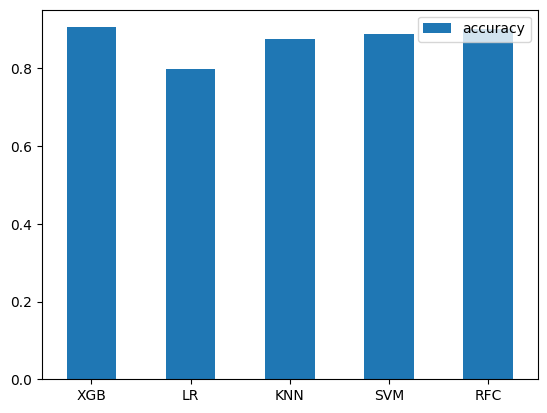

In [99]:
model_compare_df.T.plot(kind='bar');
plt.xticks(rotation=0);

By looking at the first comparison, the following models will be **eliminated**:
1. Logistic Regression
2. K-Nearest Neigbors
3. Support Vector Machine

The **algorithms left** for tuning:
1. XGBoost
2. Random Forest Classification

<hr />

### 6. Hyperparameter Tuning
Tuning the hyperparameter to see if the performance of the chosen model(s) can further be boosted.

In the chosen alogrithms, the **common hyperparameters** will be tuned in a **trial and error** manner by applying **GridSearchCV** to **exhaustively** identify the best parameters.

In [100]:
# Hyperparameter grid for XGBoost
xgb_grid = [{'XGB': XGBClassifier()}, {
    'n_estimators': [100, 150], # Number of boosting rounds - can cause overfitting
    'learning_rate': [0.1, 0.25], #  Controls the step size during boosting.
    'booster': ['gbtree', 'gblinear'], # Type of booster model. 
    'reg_lambda': [5, 10], #  L2 regularization term - can reduce overfitting
}]

# Hyperparameter grid for RandomForestClassifier
rf_grid = [{'RandomForest': RandomForestClassifier()}, {
    'n_estimators': [10, 25], # Number of trees in the forest
    'max_features': [5, 10], # Number of features to consider when splitting
    'max_depth': [10, 50, None], # Maximum depth of each tree
    'bootstrap': [True, False] # Whether to sample with replacement.
}]

models_info = [xgb_grid, rf_grid]

Make a grid search function to compare and tune the models automatically.

In [101]:
def grid_search_comparison(models_info: object, X_train: np.array, X_test: np.array, y_train: np.array, y_test: np.array) -> list:
    models_compare = []
    for info in models_info:
        current_model = ''
        for key in info[0].keys():
            current_model = key
        print(f'Current training {current_model}...')
        
        gs_model = GridSearchCV(info[0][current_model], param_grid=info[1], cv=5, verbose=1, n_jobs=-1)
        
        gs_model.fit(X_train, y_train)
        best_params = gs_model.best_params_
        score = gs_model.score(X_test, y_test)
        models_compare.append({'name': current_model,
                               'best_params': best_params,
                               'score': score})
    return models_compare

In [102]:
models_compare = grid_search_comparison(models_info, X_train, X_test, y_train, y_test)

Current training XGB...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Current training RandomForest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [103]:
models_compare

[{'name': 'XGB',
  'best_params': {'booster': 'gbtree',
   'learning_rate': 0.25,
   'n_estimators': 150,
   'reg_lambda': 10},
  'score': 0.9091544374563243},
 {'name': 'RandomForest',
  'best_params': {'bootstrap': True,
   'max_depth': 50,
   'max_features': 5,
   'n_estimators': 25},
  'score': 0.9037037037037037}]

> By looking at the score after hyperparameters tuning: **XGBoost** will be chosen as the final algorithm.

Training **XGBoost** algorithm using tuned hyperparameters.

In [104]:
cls = XGBClassifier(booster='gbtree',
                    learning_rate=0.25,
                    n_estimators=150,
                    reg_lambda=10)

cls.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<hr />

### 7. Model Inference

To evaluate the performance of the model, thus, reporting how relevant the model can be used to predict the results.

Make a **predictions** based on the **test dataset**, stored it as `y_preds`

In [105]:
y_preds = cls.predict(X_test)

**Inference / Evaluations**

**ROC curve** plots the True Positive Rate (TPR) against the False Positive Rate (FPR).
* The area under ROC Curve is referred to as **AUC**, an **perfect / ideal** model in theory will have **AUC** value of 1.0.

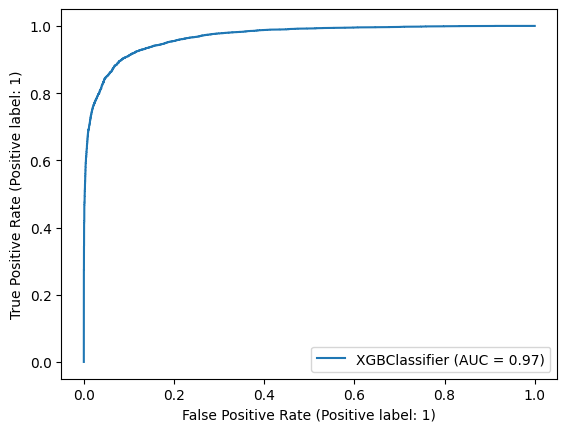

In [106]:
RocCurveDisplay.from_estimator(cls, X_test, y_test);

AUC values looks very good with a score of 0.97, with no signs of overfitting

**Confusion Matrix**

* Confusion matrix displays **True Positives**, **True Negatives**, **False Positives**, **False Negatives** of the predictions.

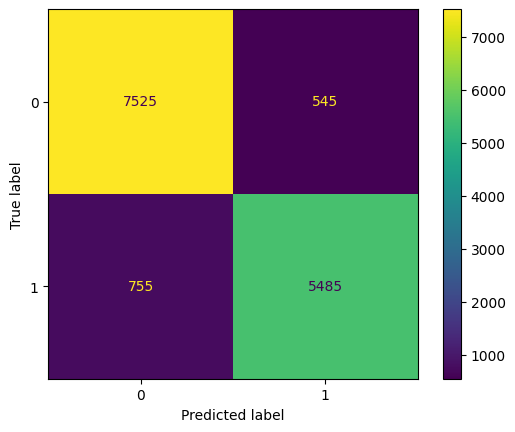

In [107]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

With this, let's generate a **classification report** to take a further look into **precision** and **recall**.
* Precision = TP / (TP + FP)
    * How good is the model at predicting correct positive predictions while minimize false **positives**.


* Recall = TP / (TP + FN)
    * How good is the model at predicting correct positive predictions while minimize false **negatives**.

In [108]:
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.908816,0.909619,0.909154,0.909217,0.909166
recall,0.932466,0.879006,0.909154,0.905736,0.909154
f1-score,0.920489,0.894051,0.909154,0.907270,0.908960
support,8070.000000,6240.000000,0.909154,14310.000000,14310.000000


To further confirmed that the score of accruacy, precision, recall, f1 is not obtained by chance:
* Perform a **Cross-Validation** test of **5-fold**, and find the **average**.

In [109]:
sc_cv = StandardScaler()
X = sc_cv.fit_transform(X)

# Accuracy Score by cross-validation
cv_acc = cross_val_score(cls, X, y, cv=5, scoring='accuracy')
cv_acc = np.mean(cv_acc)

cv_precision = cross_val_score(cls, X, y, cv=5, scoring='precision')
cv_precision = np.mean(cv_precision)

cv_recall = cross_val_score(cls, X, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)

cv_f1 = cross_val_score(cls, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)

# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1}, index=[0])

In [110]:
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.907167,0.90712,0.876278,0.891429


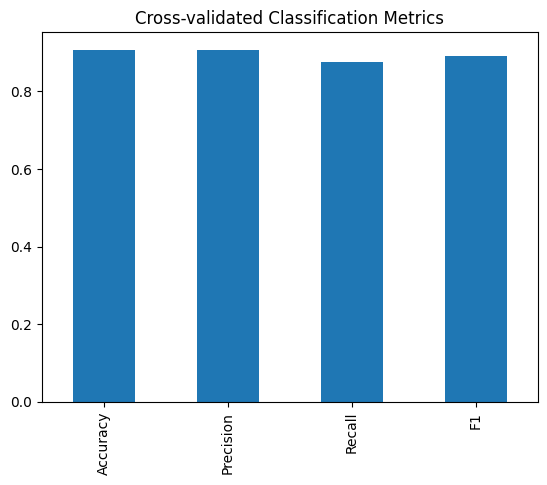

In [111]:
cv_metrics.T.plot(kind='bar', title='Cross-validated Classification Metrics', legend=False);

From the results, the model appears to be a **good model**, that can effectively predict the **satisfaction rate** of the passengers.
* 90.7% of getting a correct result most of the time (**Accuracy**).
    * With **Precision** of 90.7%
    * With **Recall** of 87.2%

<hr />

### Exporting the model

Check if weights directory exists

In [112]:
directory = './model_weights'

if not os.path.exists(directory):
    try:
        os.makedirs(directory, exist_ok=True)
        print(f"Created model directory.")
    except OSError as e:
        print(f"Failed to create model directory: {e}")

In [113]:
save_path = os.path.join(directory, 'xgb_classfier.json')

cls.save_model(save_path)

**Loading the model**

In [114]:
loaded_model = xgb.Booster()
loaded_model.load_model(save_path)

In [115]:
loaded_model.predict(xgb.DMatrix(X_test))

array([0.00543378, 0.03172293, 0.01171123, ..., 0.00348151, 0.9876511 ,
       0.2505812 ], dtype=float32)

<hr />

### Final Words - Machine Learning

With the developed machine learning model, it can successfully serve as a clear guide for the company to predict if the passengers will be satisfied after a certain services have been changed.
* For example, if business class promotions are made, there will be higher chance for the passengers to experience the services provided by the business class. Thus, with the columns present based on the new experience that the passenger has experienced, the company can predict if the person will be satisfied with the service.

Therefore, based on adjusting the services provided by the airline company, the company can use the Machine Learning model to serve as the gauge to see if the current services provided will result in a higher satisfaction rate.

With the developed model, it has 90.7% of getting the correct predictions. In another words, in every 10 predictions, 9 predictions will be successfully predicted by the model. Thus, serving as a great help for the company's decision maker.